In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_test.shape


(10000, 32, 32, 3)

In [4]:
X_test.shape


(50000, 32, 32, 3)

In [5]:
y_train.shape


(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)


In [9]:
classes = [ 'airplane' , 'automobile' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship', 'truck' ]

In [10]:
def plot_sample(X , y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

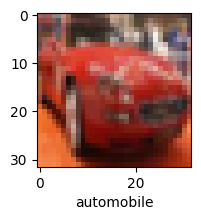

In [11]:
plot_sample(X_train , y_train, 5)

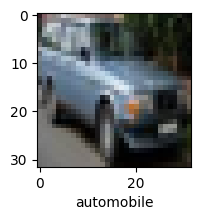

In [12]:
plot_sample(X_train, y_train, 201)

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [20]:
from tensorflow.keras import models, layers

ann = models.Sequential([ layers.Flatten(input_shape=(32, 32, 3)), layers.Dense(3000, activation='relu'), layers.Dense(1000, activation='relu'), layers.Dense(10, activation='softmax') ])

ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.8177 - accuracy: 0.3539
Epoch 2/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.6251 - accuracy: 0.4264
Epoch 3/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.5436 - accuracy: 0.4549
Epoch 4/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.4839 - accuracy: 0.4761
Epoch 5/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.4324 - accuracy: 0.4954


from tensorflow.keras import models, layers

ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classification report : \n' , classification_report(y_test, y_pred_classes))

313/313 [==============================] - 6s 19ms/step
classification report : 
               precision    recall  f1-score   support

           0       0.61      0.40      0.48      1000
           1       0.67      0.47      0.55      1000
           2       0.44      0.24      0.31      1000
           3       0.33      0.32      0.32      1000
           4       0.40      0.48      0.44      1000
           5       0.35      0.47      0.40      1000
           6       0.45      0.66      0.53      1000
           7       0.62      0.46      0.53      1000
           8       0.45      0.75      0.56      1000
           9       0.62      0.43      0.51      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



In [22]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

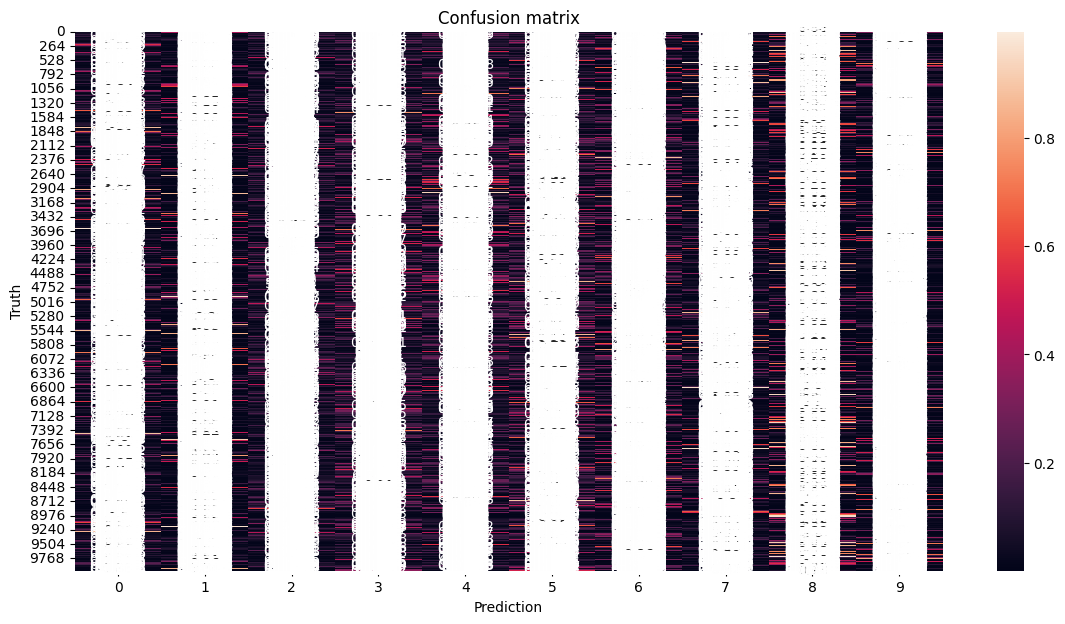

In [26]:
plt.figure(figsize = (14,7))
sns.heatmap(y_pred,annot = True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show

In [29]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32 , kernel_size = (3,3) , activation = 'relu' ,input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64 , kernel_size = (3,3) , activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])


In [31]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy' , 
              metrics=['accuracy'])

In [32]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4837 - accuracy: 0.4672
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1162 - accuracy: 0.6120
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9770 - accuracy: 0.6615
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8966 - accuracy: 0.6905
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8331 - accuracy: 0.7117
Epoch 6/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7819 - accuracy: 0.7283
Epoch 7/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7375 - accuracy: 0.7448
Epoch 8/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6900 - accuracy: 0.7607
Epoch 9/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6566 - accuracy: 0.7733
Epoch 10/10
1563/1563 [==============================] - 18s 12m

In [33]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9015 - accuracy: 0.7030


[0.9015069603919983, 0.703000009059906]

In [34]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 4ms/step


array([[6.70225173e-03, 8.32293415e-04, 1.09738333e-03, 9.60497439e-01,
        1.17467986e-04, 2.24165712e-02, 4.45281528e-03, 1.74855115e-04,
        3.40503152e-03, 3.03951587e-04],
       [7.32410990e-04, 5.12419999e-01, 8.36737513e-07, 1.55766440e-06,
        1.49310022e-08, 4.89385554e-09, 1.50054236e-09, 2.49025849e-08,
        4.86798495e-01, 4.67132668e-05],
       [1.15824118e-02, 8.17389414e-03, 7.87076424e-04, 6.84989290e-03,
        3.76442244e-04, 1.85985802e-04, 2.10842787e-04, 8.22175236e-04,
        9.68756974e-01, 2.25429912e-03],
       [9.13734972e-01, 2.37137638e-02, 2.70056259e-02, 9.91836074e-04,
        8.47267639e-03, 6.24579843e-06, 9.90078770e-05, 3.08129936e-03,
        2.28510667e-02, 4.35066904e-05],
       [1.71276645e-06, 6.04866273e-06, 5.67567255e-03, 6.49456680e-02,
        2.92489231e-01, 4.18135803e-03, 6.32683873e-01, 2.27593841e-06,
        1.41439823e-05, 9.77384360e-08]], dtype=float32)

In [35]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 6]

In [36]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

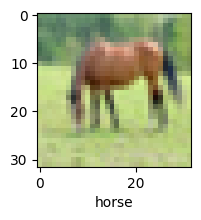

In [37]:
plot_sample(X_test , y_test, 60)

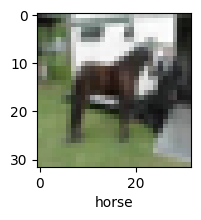

In [46]:
plot_sample(X_test , y_test, 20)

In [45]:
classes[y_classes[20]]

'horse'